<a href="https://colab.research.google.com/github/garvitupdy/news_classifier/blob/main/nlp_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('train.csv',sep = ',',header = None,names = ['Class Index','Title','Description'], on_bad_lines='skip')

In [ ]:
df.head()

,Class Index,Title,Description
0,Class Index,Title,Description
1,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
2,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
3,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
4,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...


In [ ]:
df.shape

(119999, 3)

In [ ]:
df["Class Index"].unique()
# The class index are numbered 1-4 where 1 represents World, 2 represents Sports, 3 represents Business and 4 represents Sci/Tech.

array(['Class Index', '3', '4', '2', '1'], dtype=object)

In [ ]:
df['Class Index'].value_counts()

,count
Class Index,
4,30000
1,30000
3,29999
2,29999
Class Index,1


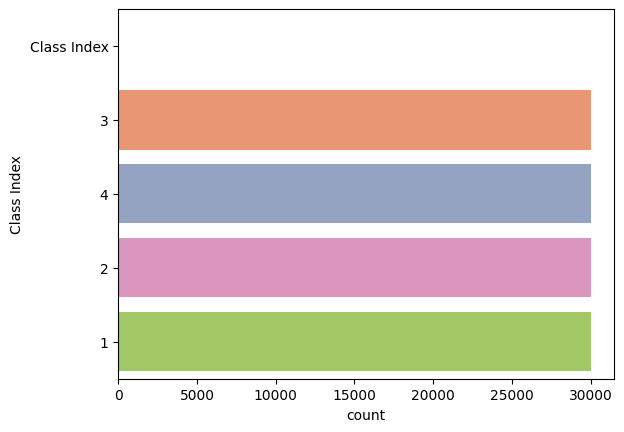

In [ ]:
sns.countplot(df['Class Index'], palette='Set2')
plt.show()


In [ ]:
df.isnull().sum()

,0
Class Index,0
Title,0
Description,0


In [ ]:
import string

In [ ]:
df["Title"] = df["Title"].apply(lambda x: x.lower())

In [ ]:
df["Description"] = df["Description"].apply(lambda x: x.lower())

In [ ]:
df.head()

,Class Index,Title,Description
0,Class Index,title,description
1,3,wall st. bears claw back into the black (reuters),"reuters - short-sellers, wall street's dwindli..."
2,3,carlyle looks toward commercial aerospace (reu...,reuters - private investment firm carlyle grou...
3,3,oil and economy cloud stocks' outlook (reuters),reuters - soaring crude prices plus worries\ab...
4,3,iraq halts oil exports from main southern pipe...,reuters - authorities have halted oil export\f...


In [ ]:
def remove_punch(txt):
  return txt.translate(str.maketrans('','',string.punctuation))


df["Title"] = df["Title"].apply(remove_punch)
df["Description"] = df["Description"].apply(remove_punch)

In [ ]:
def remove_digit(txt):
  new = ""
  for i in txt:
    if not i.isdigit():
      new += i
  return new

df["Title"] = df["Title"].apply(remove_digit)
df["Description"] = df["Description"].apply(remove_digit)

In [ ]:
def remove_emote(txt):
  new = ""
  for i in txt:
    if i.isascii():
      new += i
  return new




In [ ]:
df['Title'] = df['Title'].apply(remove_emote)
df['Description'] = df['Description'].apply(remove_emote)

In [ ]:
df.head()

,Class Index,Title,Description
0,Class Index,title,description
1,3,wall st bears claw back into the black reuters,reuters shortsellers wall streets dwindlingba...
2,3,carlyle looks toward commercial aerospace reuters,reuters private investment firm carlyle group...
3,3,oil and economy cloud stocks outlook reuters,reuters soaring crude prices plus worriesabou...
4,3,iraq halts oil exports from main southern pipe...,reuters authorities have halted oil exportflo...


In [ ]:
df.loc[0,"Description"]

'description'

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.drop(index=0, inplace=True)

In [ ]:
df.loc[111,"Description"]

'ap  normally clannish and agressive argentine ants have become so laid back since arriving in australia decades ago that they no longer fight neighboring nests and have formed a supercolony here that spans  miles scientists say'

In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords = set(stopwords.words('english'))

In [ ]:

def remove(txt):
  words = txt.split()
  cleaned = []
  for i in words:
    if not i in stopwords:
      cleaned.append(i)

  return ' '.join(cleaned)


df["Title"] = df["Title"].apply(remove)
df["Description"] = df["Description"].apply(remove)

In [ ]:
df.loc[111,"Description"]

'ap normally clannish agressive argentine ants become laid back since arriving australia decades ago longer fight neighboring nests formed supercolony spans miles scientists say'

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[["Description","Title"]],df["Class Index"],test_size=0.2,random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X_train_combined = X_train['Description'] + ' ' + X_train['Title']
X_test_combined = X_test['Description'] + ' ' + X_test['Title']


bow = TfidfVectorizer()
X_train_bow = bow.fit_transform(X_train_combined)
X_test_bow = bow.transform(X_test_combined)

nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)


pred_bow = nb_model.predict(X_test_bow)
print(accuracy_score(y_test, pred_bow))

0.9075240996536327


In [ ]:
import pickle

# Save the Naive Bayes model
with open('nb_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)
print("Naive Bayes model saved as 'nb_model.pkl'")

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(bow, f)
print("TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'")

Naive Bayes model saved as 'nb_model.pkl'
TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'


In [ ]:
 title = "UN Climate Summit Reaches Historic Agreement on Carbon Emissions"
description = "World leaders gathered at the United Nations Climate Summit have reached a landmark agreement to reduce global carbon emissions by 50% by 2030. The accord includes commitments from over 190 countries to transition to renewable energy sources and implement stricter environmental regulations. This historic deal comes after weeks of intense negotiations and represents a significant step forward in the global fight against climate change."



def predict_news_category(title, description):
    # Combine title and description and preprocess
    combined_text = description  + title

    combined_text = combined_text.lower()
    combined_text = remove_punch(combined_text)
    combined_text = remove_digit(combined_text)
    combined_text = remove_emote(combined_text)

    # Transform the text using the loaded TF-IDF vectorizer
    text_vectorized = bow.transform([combined_text])

    # Predict the class using the loaded Naive Bayes model
    prediction = nb_model.predict(text_vectorized)[0]

    # Map class index to category name
    class_map = {
        '1': 'World',
        '2': 'Sports',
        '3': 'Business',
        '4': 'Sci/Tech'
    }
    return class_map.get(prediction, 'Unknown Category')




In [ ]:
predict_news_category(title,description)

'World'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer



corpus = df["Description"] + " " + df["Title"]

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit the vectorizer to the corpus
a = vectorizer.fit_transform(corpus)

# Get the unique words (features)
unique_words = vectorizer.get_feature_names_out(a)

print(f"Count of Unique Words: {len(unique_words)}")

Count of Unique Words: 91165


In [ ]:
unique_words[67320]

In [ ]:
unique_words

In [ ]:
for i in unique_words:
  print(i)



In [ ]:

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in unique_words]

print(f"Original unique words count: {len(unique_words)}")
print(f"Lemmatized words count: {len(lemmatized_words)}")
print("First 10 lemmatized words:", lemmatized_words[:10])